# Data Processing(10 droplets)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os
import random

In [2]:
def mk_dataframe(path):
    df = pd.read_table(path, sep=" ", header=None)
    df = df.drop(columns=0, axis=1)
    df = df.drop(columns=df.shape[1], axis=1)
    return df

data_path = "231030/pos-0.dat"
df = mk_dataframe(data_path)

In [3]:
df_ = df.values

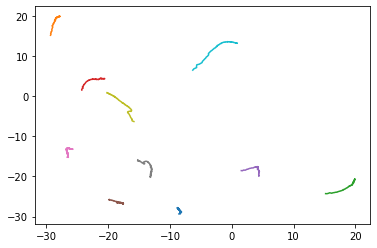

In [4]:
for i in range(10):
    plt.plot(df_[:1000:10,i], df_[:1000:10,i+1])

In [5]:
df_

array([[ -8.54958389, -29.33367785,  15.20083853, ...,  21.59633566,
          6.31642525,  29.33174751],
       [ -8.52344272, -29.32858204,  15.22502375, ...,  21.5851134 ,
          6.44302857,  29.28771429],
       [ -8.5432322 , -29.35768421,  15.25975335, ...,  21.66210039,
          6.3730101 ,  29.33876094],
       ...,
       [-23.42511864,  15.01132203, -21.00466421, ...,  14.61472581,
         23.56836364, -14.12526482],
       [-23.47457377,  15.0215082 , -21.06185214, ...,  14.62533871,
         23.57417188, -14.14773438],
       [-23.38842276,  14.96892683, -20.98576604, ...,  14.647456  ,
         23.5928583 , -14.16317409]])

In [6]:
v_vector = np.diff(df_, axis=0)

In [13]:
v_vector[0]

array([ 0.02614117,  0.00509581,  0.02418522, -0.05898265,  0.19539699,
       -0.04454225,  0.07903338, -0.17013643,  0.01397557, -0.03154578,
        0.04400208, -0.06610451, -0.01328571, -0.04837156,  0.24494588,
       -0.06988217, -0.0081524 , -0.01122226,  0.12660332, -0.04403322])

In [79]:
"""
今回は配列coordinatesの中の一番最初の油滴を基準に

データ構造
[[基準が次にどの方向へ進むか(label), 基準から見た角度1, 基準から見た距離1, 基準から見た角度2, 基準から見た距離2, .... , 基準から見た角度9, 基準から見た距離9], ...]

基準がどこの方向へ進むか --> 360度を30度ごとにラベル付け（例：次15度の方向に移動ｰ>ラベル0 / 次65度の方向に移動ｰ>ラベル2 
"""

import math

class DataCreate():
    def __init__(self, input_data, vectors):
        self.input_data = input_data[1:] # ベクトルのlenと合わせる
        self.vectors = np.diff(input_data, axis=0)
        
    def __call__(self):
        labels = []
        data_d_and_angle = []

        for i in range(len(self.input_data) - 1):

            temp_list = []

            temp_coordinate = self.input_data[i] # i秒目における各点の座標
            x_target = temp_coordinate[0] # # i秒目におけるtargetのx座標
            y_target = temp_coordinate[1] # # i秒目におけるtargetのy座標

            vectors = self.vectors[i] # <-- 次の時刻との差

            target_vector = np.arctan(vectors[1] / vectors[0]) * 180 / np.pi

            # 360度に変換
            if target_vector < 0:
                target_vector = x - 360 * math.floor(target_vector/360)

            label = target_vector // 30

            labels.append(label)

            # 各点とtargetを比較
            for j in range(2,coordinates.shape[1], 2):
                # 基準となる座標と比べる座標の差
                x_diff = x_target - temp_coordinate[j]
                y_diff = y_target - temp_coordinate[j+1]

                tan = y_diff / x_diff

                # 基準から見た角度
                atan = np.arctan(tan) * 180 / np.pi
                temp_list.append(atan)
                # 基準との距離
                d = math.sqrt(x_diff ** 2 + y_diff ** 2)
                temp_list.append(d)

            data_d_and_angle.append(temp_list)
            
        self.labels = np.array(labels)
        self.data_d_and_angle = np.array(data_d_and_angle)
        
    def __len__(self):
        return len(self.data_d_and_angle)

In [89]:
data = DataCreate(df_)

In [90]:
data()

AttributeError: 'DataCreate' object has no attribute 'data_d_and_angle'

In [85]:
data()

/tmp/ipykernel_5053/2275726791.py:30: RuntimeWarning: invalid value encountered in scalar divide
  target_vector = np.arctan(vectors[1] / vectors[0]) * 180 / np.pi
/tmp/ipykernel_5053/2275726791.py:30: RuntimeWarning: divide by zero encountered in scalar divide
  target_vector = np.arctan(vectors[1] / vectors[0]) * 180 / np.pi


In [87]:
data.data_d_and_angle

array([[ 11.87838635,  24.26812712,  46.31599408, ...,  52.18852698,
         75.67672172,  60.49682189],
       [ 11.97755984,  24.3327346 ,  46.68975386, ...,  52.31119001,
         75.7415234 ,  60.56209176],
       [ 12.20214681,  24.25458434,  47.05611114, ...,  52.23147223,
         75.85890178,  60.59146527],
       ...,
       [-86.33120025,  36.80942156,  82.80451651, ...,  44.38735054,
        -31.88340994,  55.24823942],
       [-86.22837457,  36.7963452 ,  82.94725235, ...,  44.45029117,
        -31.79946576,  55.29311052],
       [-86.24749233,  36.86538585,  83.15357152, ...,  44.46638701,
        -31.79805099,  55.35728659]])

In [88]:
len(data)

35086